## Axis Insurance

### Objectives

* Perform **Exploratory Data Analysis** on dataset
* Prove/disprove: 
    * Medical claims made by smokers are greater than those made by non-smokers
    * BMI of females is different from that of males.
* Determine if proportion of smokers is significantly different across different regions
* Determine (statistically) whether or not the BMIs are equal for females with:
    * No children
    * One child
    * Two children

**(Level of Significance to be Used: 0.05)**

### Data Provided

* Age - of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government)
* Sex - gender of beneficiary, (male/female)
* BMI - body mass index (how over or underweight a person is relative to their height)
    * BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9
* Children - the number of children/dependents covered by the insurance plan
* Smoker - if the insured regularly smokes tobacco (yes/no)
* Region - place of residence (USA) of beneficiary
    * 4 geographic regions: Northeast, Southeast, Southwest, or Northwest
* Charges - medical costs (for the individual) billed to health insurance

* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase Cities
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
Transmission : The type of transmission used by the car. (Automatic / Manual)
Owner : Type of ownership
Mileage : The standard mileage offered by the car company in kmpl or km/kg
Engine : The displacement volume of the engine in CC.
Power : The maximum power of the engine in bhp.
Seats : The number of seats in the car.
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [2]:
# Import neccessary Python libraries

import pandas as pd # Library for processing data (series/dataframes)
import numpy as np # Library for working with arrays and various math requests

import matplotlib.pyplot as plt # Library for basic plot/graph implementation

# Graphs/plots will be included in the workbook and shown following the respective code run
%matplotlib inline 

import seaborn as sns # Library containing expanded plot options for presentation

import warnings # Library for handling Python error messages, etc.
warnings.filterwarnings('ignore') # Ignore any Python warnings about updated library details, etc.

In [3]:
# Import the company dataset

data = pd.read_csv('C:/Users/svenm/Documents/Data Science Training/Business Statistics/Project 2/AxisInsurance.csv')

In [4]:
# Create a copy of the data as backup

df = data.copy()

In [5]:
# Inspect the data - top 5 rows

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Inspect the data - bottom 5 rows

df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# Inspect the data - overall shape (rows/columns)

df.shape

(1338, 7)

In [8]:
df.info() # Inspect the data - specific column datatypes and count of values/nulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observations

- There are 7 columns and 1,338 rows
    - There are no null values in the data
- Age, BMI, Children, and Charges are numerical datatypes
    - Although it could possibly be converted to categorical, the **Children column will remain as numerical** for purposes of this analysis
- All others (Sex, Smoker, and Region) are non-numerical
    - **These will be converted to categorical datatypes**

## Data Preprocessing

### Fixing Datatypes

In [64]:
# The following columns will be converted from object to category:

df['sex']=df.sex.astype('category') 
df['smoker']=df.smoker.astype('category')
df['region']=df.region.astype('category')

In [10]:
df.dtypes # Recheck the data types to make sure all non-numerical are now categorical

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

### Variable Observations

#### Numerical

- Discrete: 
    - Age (for the purposes of this analysis)
    - Children (Dependents)
- Continuous: 
    - BMI
    - Charges
    
#### Categorical

- Ordinal:
    - N/A: Nothing in this specific sample dataset
- Nominal:
    - Sex
    - Smoker
    - Region
    
    




In [11]:
# Confirming no Nulls/NAs - None expected per summary above
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Summary Statistics & Unique Value Counts

In [12]:
# View statistical summary of dataset, categorical columns included

df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [13]:
df['sex'].value_counts() # Summarize specific column counts of unique values - Sex

male      676
female    662
Name: sex, dtype: int64

In [14]:
df['children'].value_counts() # Summarize specific column counts of unique values - Children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
df['smoker'].value_counts() # Summarize specific column counts of unique values - Smoker

no     1064
yes     274
Name: smoker, dtype: int64

In [16]:
df['region'].value_counts() # Summarize specific column counts of unique values - Region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Observations

- The sample dataset is **relatively evenly split by gender**
    - Slightly more males than females, split 676/662 respectively
- On average, most of the beneficiaries in the sample have **at least 1 child**, with data ranging from: 0 to 5 children
     - However, **beneficiaries with 0 children/dependents account for 43%** of the sample dataset (574/1,338)
- Nearly **80% of the sample dataset consists of non-smokers** (1,064/1,338)
- **The 4 regions sampled have similar splits** 
    - The Southeast region shows up slightly more often, however, 27% of the total distribution (364/1,338)
- The average age is just over 39 years, with **50% of the dataset aged 39 or younger**
    - Ages range from 18 - 64 (which is the maximum age before government coverage eligibility)
- BMI ranges from: 16 - 53.1 with a **mean score of 30.7 and median of 30.4**
- **The average claim (charge) is around \\$13.3k**, with 50\% of claims costing around \\$9.4k per claim
    - **Claims within the sample range from \\$1.1k to \\$63.8k**

## EDA - Univariate

### Categorical

In [17]:
def plotpercent(plot,feature): # Create a function to add percentages to Countplots to follow below
    total=len(feature) # Total count of values (rows) in column/feature provided
    
    # For loop to add percentages to each datapoint within provided category
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Height of one column vs. total within the master range
        x = p.get_x() + p.get_width() / 2 - .05 # Width of the plot for x placement of annotation
        y = p.get_y() + p.get_height() + 5.5 # Height of the plot for y placement of annotation
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage using x/y placement and provided sizes   

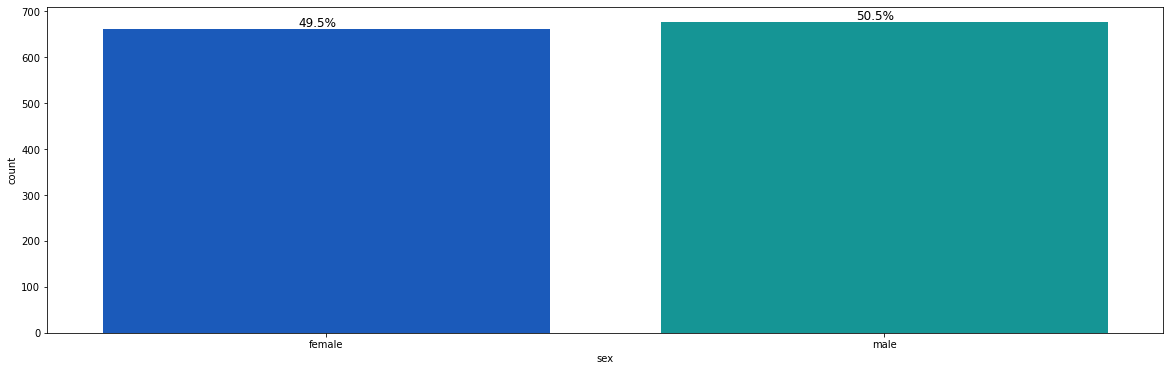

In [18]:
# Provide visualization of Categorical datapoints

plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
ax=sns.countplot(df['sex'], palette='winter'); # Countplot showing sample gender split
plotpercent(ax,df['sex']) # Call function above for percentage split annotations

#### Observations - Sex

- Relatively even split by gender, as expected from earlier analysis
    - Slightly more males than females, however not significant

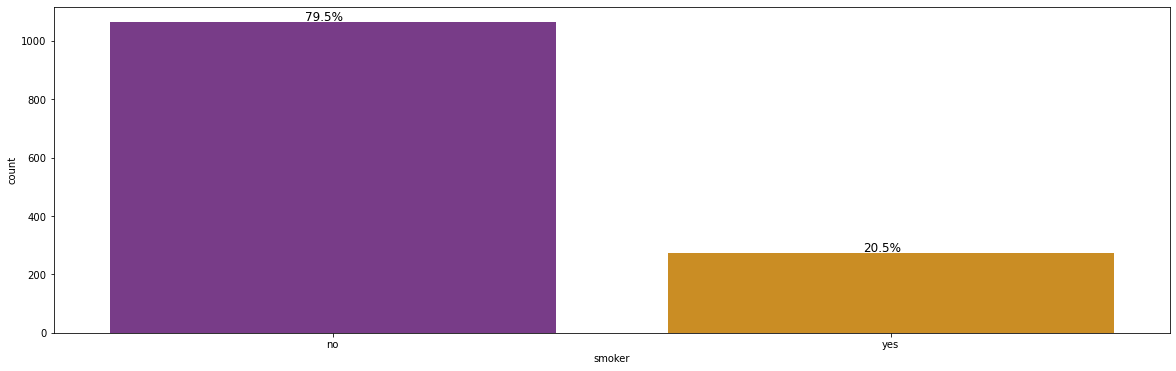

In [19]:
plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
ax=sns.countplot(df['smoker'], palette='CMRmap'); # Countplot showing sample split by smoker/non-smoker
plotpercent(ax,df['smoker']) # Call function above for percentage split annotations

#### Observations - Smoker

- Sample set distribution primarily composed of non-smokers
    - Smokers only make up 1/5th of sample dataset

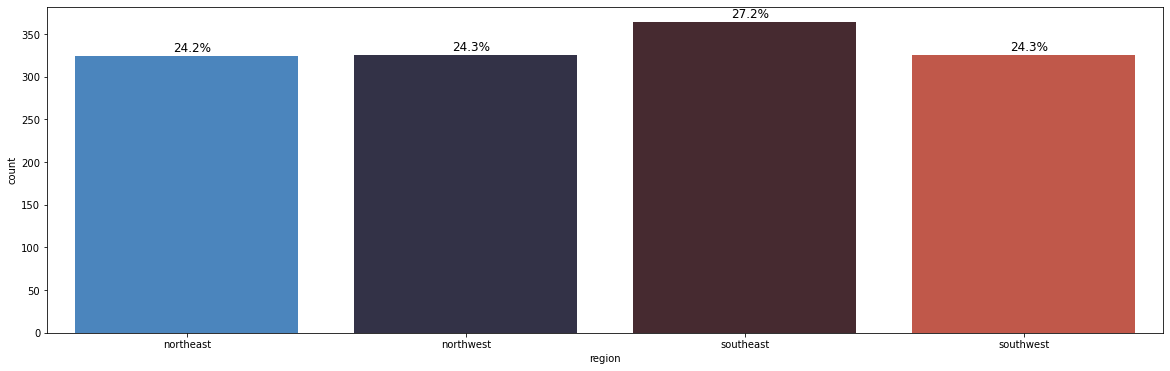

In [20]:
plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
ax=sns.countplot(df['region'], palette='icefire'); # Countplot showing sample split by region
plotpercent(ax,df['region']) # Call function above for percentage split annotations

#### Observations - Regions

- The sample set is relatively evenly split across the 4 regions
    - The Southeast shows up slightly more often than the other regions
    - Further analysis will need to be performed to determine whether or not this is significant

### Numerical

In [21]:
# Provide visualization of Numerical datapoints

# Create a function to pull together histogram and boxplots across a variety of variables provided

def histbox(feature, figsize=(20,10), bins = None):

f, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, # Create a subplot with 2 rows (shared x axis)
                                  sharex = True,
                                  figsize = figsize)
sns.distplot(feature, kde=True, ax=ax_hist1, bins=bins) # Plot the estimated distribution (kde) for data inputs
ax_hist1.axvline(np.mean(feature), color = 'green', linestyle = '--') # Include mean in histogram (green)
ax_hist1.axvline(np.median(feature), color = 'red', linestyle = '--') # Include median in histgram (red)
sns.boxplot(feature, ax=ax_box1, showmeans=True, color = 'purple') # Include mean (green triangle) in Boxplot
plt.grid() # Add a grid to histograms

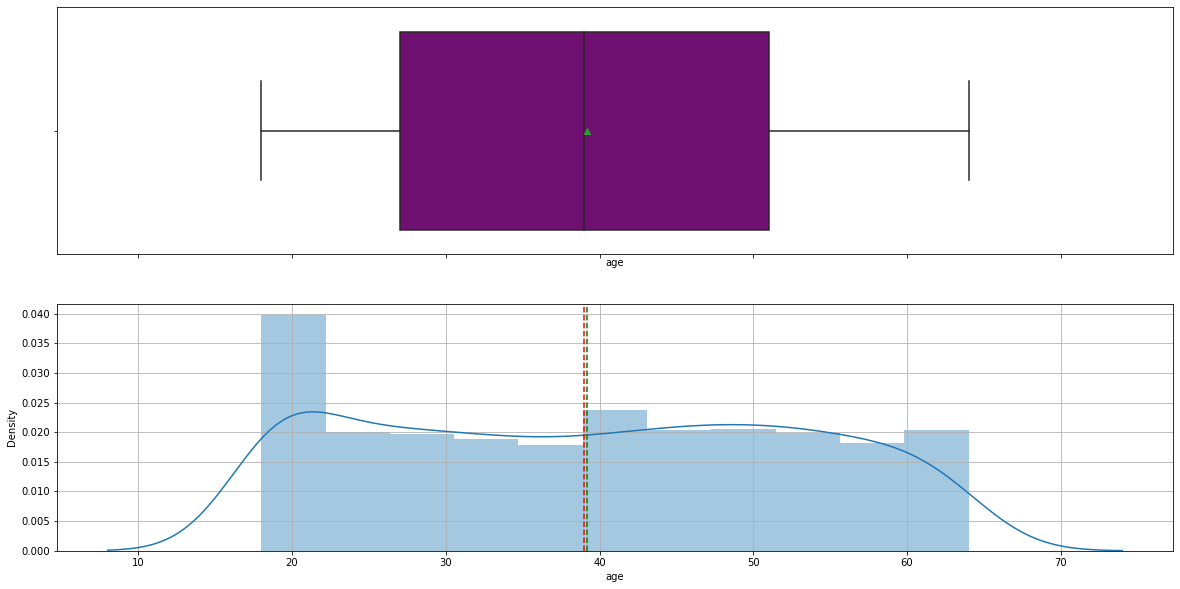

In [22]:
histbox(df['age']) # Run above function for the Age column in the sample

#### Observations - Age
- The Age distribution within the sample does appear to be somewhat similar to a normally distributed curve
    - The Mean and Median ages are nearly identical, 39.2 vs. 39 respectively
    - There are some outliers, particularly in the lower ranges around 20 years, that are affecting the distribution curve to some extent
    - **Statistical analysis needed to determine if sample mean indicative of overall population mean**


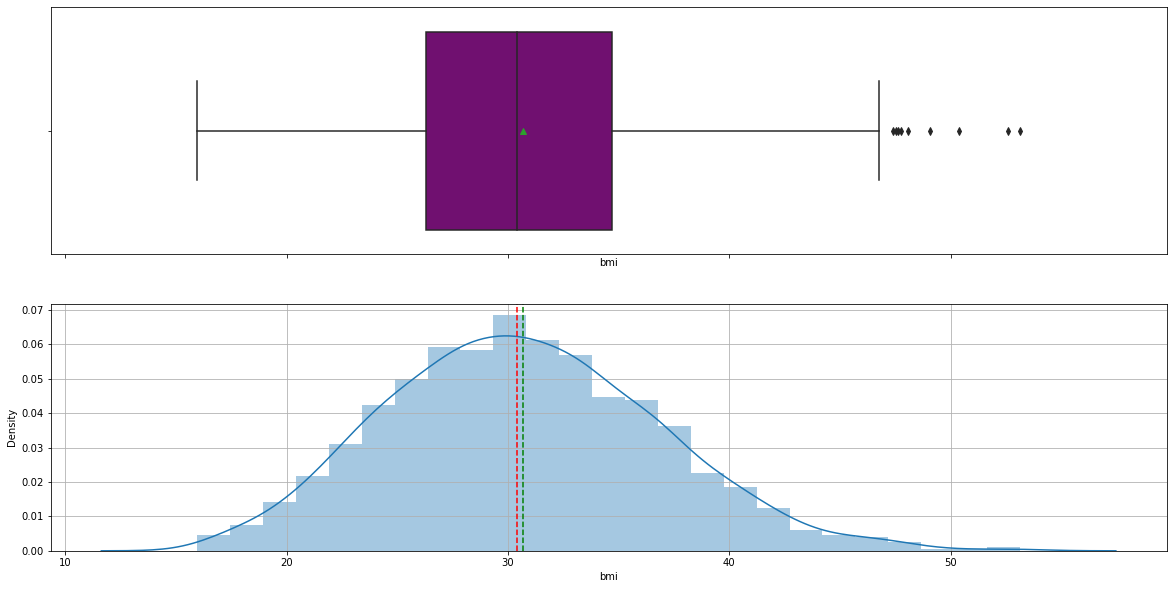

In [23]:
histbox(df['bmi']) # Run above function for the BMI column in the sample

In [24]:
# Compare Mean, Median, and Mode for BMI, since it appears to be normally distributed (above)

print('Mean: {}'.format(round(df['bmi'].mean(),2)))
print('Median: {}'.format(round(df['bmi'].median(),2)))
print('Mode: {}'.format(round(df['bmi'].mode()[0],2))) 

Mean: 30.66
Median: 30.4
Mode: 32.3


#### Observations - BMI
- The BMI data within the sample appear to be normally distributed (slightly right-skewed) but will need to be confirmed statistically
    - Mean and Median are very similar, 30.7 vs. 30.4 respectively, with a slightly higher mode of 32.3
    - There appears to be some outliers out to the right (upper) tail of the BMI dataset
    - **Statistical analysis is needed to determine if sample mean indicative of overall population mean**

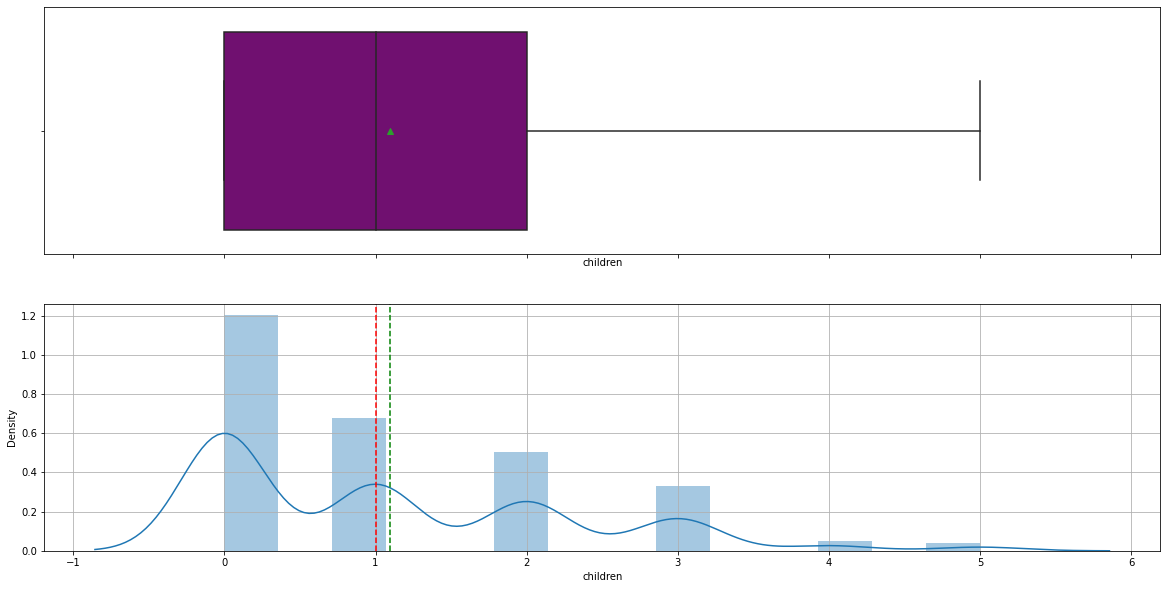

In [25]:
histbox(df['children']) # Run above function for the Children column in the sample

#### Observations - Children
- The largest subset (count) of children/dependents within the sample distribution is at value: 0
- The mean and median are relatively equally positioned at 1.09 and 1 respectively
- The majority of the data, excluding outliers consists of individuals with 0 to 2 children
- There are various outliers within the sample data, ranging from 3 through 5 children

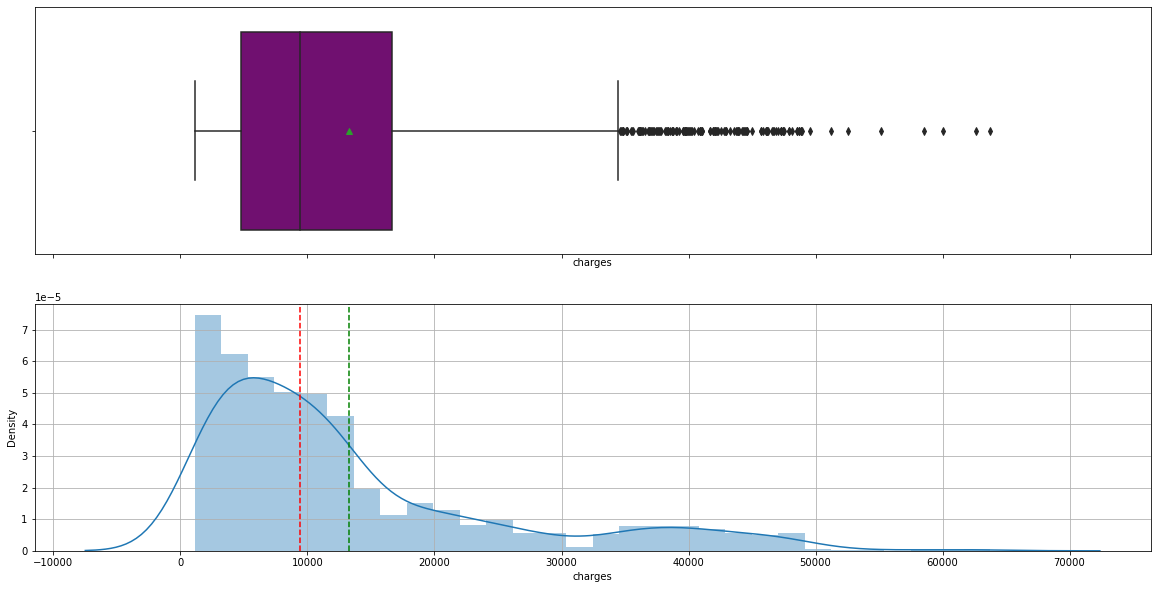

In [26]:
histbox(df['charges']) # Run above function for the Charges column in the sample

#### Observations - Charges 
 
- Charges are right-skewed (mean of \\$13.3k  higher than median of \\$9.4k), with many outliers further to the right
- **Statistical analysis needed to determine if sample mean indicative of overall population mean**

### One Sample T-Test for Population Means (Age, BMI, and Charges)

In [27]:
# Calculate mean values for each of the numerical categories referenced above

agemean = round(df['age'].mean(),2) 
bmimean = round(df['bmi'].mean(),2)
chargesmean = round(df['charges'].mean(),2)

# Children variable excluded as not deemed statistically significant for mean statistical analysis


print('The mean age within the sample is: {}'.format(agemean))
print('The mean BMI within the sample is: {}'.format(bmimean))
print('The mean charges within the sample is: {}'.format(chargesmean))

The mean age within the sample is: 39.21
The mean BMI within the sample is: 30.66
The mean charges within the sample is: 13270.42


## Age

### Stating the Null and Alternative Hypothesis

Let $\mu$ be the Population mean for Ages and set to equal to respective sample mean.

x_bar = 39.21 (Sample Age mean)

**Null Hypothesis**

>$H_0:\mu=\ 39.21$

**Alternate hypothesis**

>$H_a:\mu_\ \neq\ \ 39.21$

### Are T-test assumptions Satisfied?

- **Continuous Data** - Yes, average Ages are measured on a continuous scale
- **Normally Distributed Populations** - Yes, the populations are assumed to be normal (n>30)
- **Random Sampling from Population** - Yes, the sample is believed to be a simple random sample
- **Population Standard Deviation Known** - No, only the Sample Standard Deviation (calculated)

We can therefore use the one sample T-test for this problem.

In [28]:
# Import the required functions statistical function for the 1 Sample t-Test

from scipy.stats import ttest_1samp

# Find the p-value

test_stat, p_value = ttest_1samp(df['age'], popmean = agemean, alternative = 'two-sided')
print('The p-value is ', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is  0.9938221917238379
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

As the **p-value is significantly higher** than the significance level of 0.05, we therefore **fail to reject the null hypothesis.**<br>
There is **no significant statistical significance** that the population mean age is different to the mean sample age calculated. 

## BMI

### Stating the Null and Alternative Hypothesis

Let $\mu$ be the Population mean for BMI and set to equal to respective sample mean.

x_bar = 30.66 (Sample BMI mean)

**Null Hypothesis**

>$H_0:\mu=\ 30.66$

**Alternate hypothesis**

>$H_a:\mu_\ \neq\ \ 30.66$

### Are T-test assumptions Satisfied?

- **Continuous Data** - Yes, average BMIs are measured on a continuous scale
- **Normally Distributed Populations** - Yes, the populations are assumed to be normal (n>30)
- **Random Sampling from Population** - Yes, the sample is believed to be a simple random sample
- **Population Standard Deviation Known** - No, only the Sample Standard Deviation (calculated)

We can therefore use the one sample T-test for this problem.

In [29]:
# Import the required functions statistical function for the 1 Sample t-Test

from scipy.stats import ttest_1samp

# Find the p-value

test_stat, p_value = ttest_1samp(df['bmi'], popmean = bmimean, alternative = 'two-sided')
print('The p-value is ', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is  0.9837469870136897
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

As the **p-value is significantly higher** than the significance level of 0.05, we therefore **fail to reject the null hypothesis.**<br>
There is **no significant statistical significance** that the population mean BMI is different to the mean sample BMI calculated. 

## Charges

### Stating the Null and Alternative Hypothesis

Let $\mu$ be the Population mean for Charges and set to equal to respective sample mean.

x_bar = \\$13270.42 (Sample Charges mean)

**Null Hypothesis**

>$H_0:\mu=\$13270.42$

**Alternate hypothesis**

>$H_a:\mu_\ \neq\ \$13270.42$

### Are T-test assumptions Satisfied?

- **Continuous Data** - Yes, average Charges are measured on a continuous scale
- **Normally Distributed Populations** - Yes, the populations are assumed to be normal (n>30)
- **Random Sampling from Population** - Yes, the sample is believed to be a simple random sample
- **Population Standard Deviation Known** - No, only the Sample Standard Deviation (calculated)

We can therefore use the one sample T-test for this problem.

In [30]:
# Import the required functions statistical function for the 1 Sample t-Test

from scipy.stats import ttest_1samp

# Find the p-value

test_stat, p_value = ttest_1samp(df['charges'], popmean = chargesmean, alternative = 'two-sided')
print('The p-value is ', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is  0.9999945419481704
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

As the **p-value is significantly higher** than the significance level of 0.05, we therefore **fail to reject the null hypothesis.**<br>
There is **no significant statistical significance** that the population mean charges is different to the mean sample charges calculated. 

### Summary

There is **no significant statistical significance** that the population means for age, BMI, and charges are different to the mean sample age calculated.  We can therefore assume that they are equal.

## EDA - Bivariate

In [67]:
# Check the correlation of numerical columns to determine if any strong relationships exists wiht data
correlation = df.corr()

#### Observations - Correlation 
 
- There doesn't appear to be any strong correlations between the 4 numerical columns
- Heat map analysis will only show correlations that are low (.3 or lower)

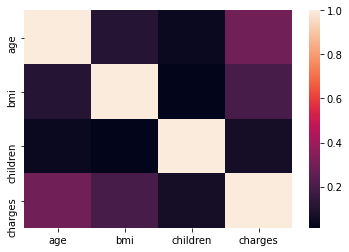

In [71]:
sns.heatmap(correlation);

#### Observations - Correlation 
 
- Again, there doesn't appear to be any strong correlations between the 4 numerical columns


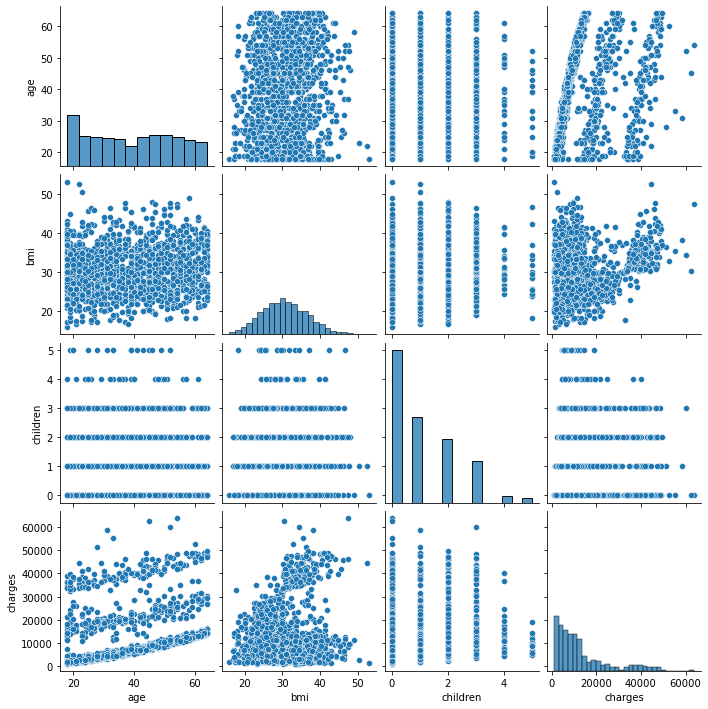

In [54]:
# Run a pair plot to determine if any strong correlations exist between the numerical variables
sns.pairplot(df);

#### Observations - Correlation 
 
- Again, there doesn't appear to be any strong correlations between the 4 numerical columns


### Split of Charges Paid by Age Group

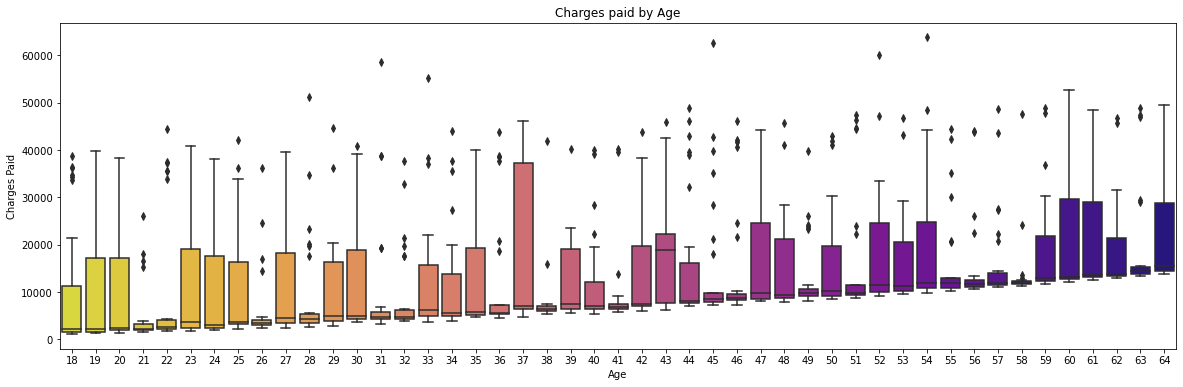

In [32]:
plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
sns.boxplot(x='age', y='charges', data=df, palette='plasma_r');
plt.title('Charges paid by Age');
plt.xlabel('Age');
plt.ylabel('Charges Paid');

#### Observations - Charges by Age
- Roughly 50% of the sample ages fall under 40 years of age
- Excluding occasional outliers, the younger a beneficiary's age the lower the claim
    - The same can be said for the inverse regarding age

### No. of Children by Age Group

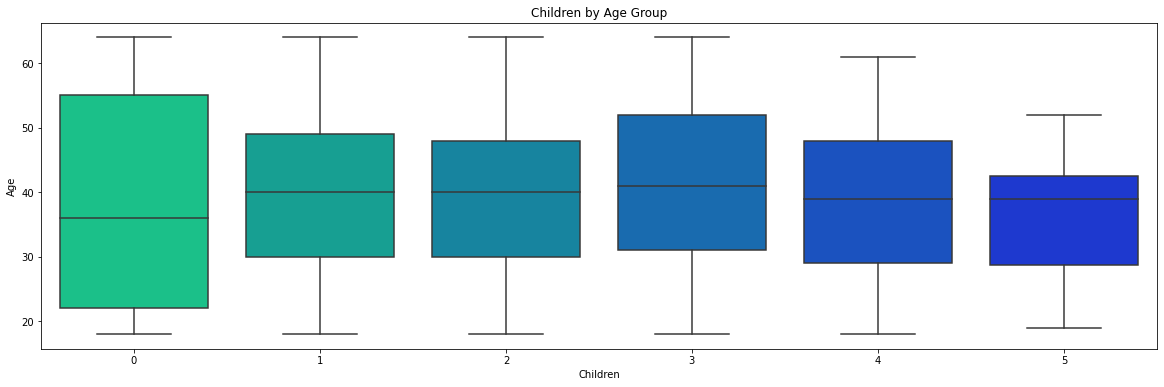

In [33]:
plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
sns.boxplot(x='children', y='age', data=df, palette='winter_r');
plt.title('Children by Age Group');
plt.xlabel('Children');
plt.ylabel('Age');

#### Observations - Children by Age Group
- Beneficiaries with 0 children make up the bulk of the sample dataset
    - This same group also has the largest age range (mid 20's to mid 50's)

### Split of Charges Paid by Smokers/Non-Smokers

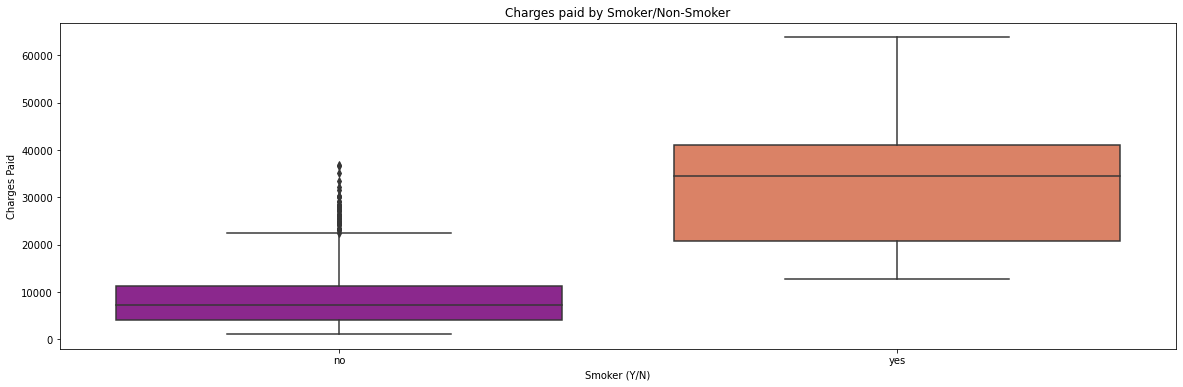

In [34]:
# Plot a boxplot comparing Charges by Smokers vs. Non-Smokers

plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
sns.boxplot(x='smoker', y='charges', data=df, palette='plasma');
plt.title('Charges paid by Smoker/Non-Smoker');
plt.xlabel('Smoker (Y/N)');
plt.ylabel('Charges Paid');

In [35]:
# Build various metrics for comparison - Charges by Smoker vs. Non-Smoker

smokercostspercent = round(df['charges'][df['smoker']=='yes'].sum()/df['charges'].sum(),2) # Calculate % of Charges by Smoker
nonsmokercostspercent = round(df['charges'][df['smoker']=='no'].sum()/df['charges'].sum(),2) # Calculate % of Charges by Non-Smoker

print('Smoker share of total costs: {}%'.format(smokercostspercent*100))
print('Non-smoker share of total costs: {}%'.format(nonsmokercostspercent*100))

smokers = df['charges'][df['smoker']=='yes'] # Calculate Total Charges paid to beneficiaries who smoke
nonsmokers = df['charges'][df['smoker']=='no'] # Calculate Total Charges paid to beneficiaries who don't smoke

# Calculate the Mean, Std Dev, and Variance for Charges by Smoker/Non-Smoker and Overall

# Mean
avgsmokerclaim = round(df['charges'][df['smoker']=='yes'].mean(),2)
avgnonsmokerclaim = round(df['charges'][df['smoker']=='no'].mean(),2)
avgoverallclaim = round(df['charges'].mean(),2)

# Std Dev
stdsmokerclaim = round(df['charges'][df['smoker']=='yes'].std(),2)
stdnonsmokerclaim = round(df['charges'][df['smoker']=='no'].std(),2)
stdoverallclaim = round(df['charges'].std(),2)

# Variance (Std Dev squared)
popvarsmokerclaim = round(stdsmokerclaim**2,2)
popvarnonsmokerclaim = round(stdnonsmokerclaim**2,2)
popvaroverallclaim = round(stdoverallclaim**2,2)


print('')
print('Average cost of claim per smoker: {}'.format(avgsmokerclaim))
print('Average cost of claim per non-smoker: {}'.format(avgnonsmokerclaim))
print('Average claim by either smoker/non-smoker: {}'.format(avgoverallclaim))

print('')
print('Std Dev - claim per smoker: {}'.format(stdsmokerclaim))
print('Std Dev - cost of claim per non-smoker: {}'.format(stdnonsmokerclaim))
print('Std Dev - claim by either smoker/non-smoker: {}'.format(stdoverallclaim))

print('')
print('Pop Var - BMI of Females: {}'.format(popvarsmokerclaim))
print('Pop Var - BMI of Males: {}'.format(popvarnonsmokerclaim))
print('Pop Var - Overall BMI: {}'.format(popvaroverallclaim))


print('')
print('On a per claim basis, smokers make claims that are {}x higher than non-smoker claims.'.format(round(avgsmokerclaim/avgnonsmokerclaim,1)))
print('On a per claim basis, smokers make claims that are {}x higher than non-smoker claims.'.format(round(avgsmokerclaim/avgoverallclaim,1)))


Smoker share of total costs: 49.0%
Non-smoker share of total costs: 51.0%

Average cost of claim per smoker: 32050.23
Average cost of claim per non-smoker: 8434.27
Average claim by either smoker/non-smoker: 13270.42

Std Dev - claim per smoker: 11541.55
Std Dev - cost of claim per non-smoker: 5993.78
Std Dev - claim by either smoker/non-smoker: 12110.01

Pop Var - BMI of Females: 133207376.4
Pop Var - BMI of Males: 35925398.69
Pop Var - Overall BMI: 146652342.2

On a per claim basis, smokers make claims that are 3.8x higher than non-smoker claims.
On a per claim basis, smokers make claims that are 2.4x higher than non-smoker claims.


#### Observations - Medical Claims by Smoker/Non-Smoker
- **On a total claim basis, smokers only make up around 20% of the sample data but account almost 50% of total charges**
- Average claims by smokers appear to be nearly 4x the amount of average claims made by non-smokers (\\$32k/\\$8.4k) and are nearly 2.5x the average claims within the sample (\\$32k/\\$13.3k)
- Medical claims amounts appear to be disproportionally higher for smokers than by non-smokers
    - However, is there statistically significant evidence that smokers make up a higher proportion of overall claims filed than non-smokers?
    - Further statistical analysis needs to be performed


## Statistical Analysis - 0.05 Level of Significance

### Split of Claims by Smokers vs. Non-Smokers

### Stating the Null and Alternative Hypothesis

Let $\mu_1, \mu_2$ be the mean claims paid to beneficiaries who are **Smokers** vs. **Non-Smokers**.

**Null Hypothesis**

>$H_0:\mu_1<=\mu_2$

**Alternate hypothesis**

>$H_a:\mu_1\ > \mu_2$

### Are T-test assumptions Satisfied?

- **Continuous Data** - Yes, Average claim amounts are measured on a continuous scale
- **Normally Distributed Populations** - Yes, the populations are assumed to be normal (n>30)
- **Independent Populations** - As we are taking random samples for separate groups (Smoker vs. Non-Smoker), the samples are from independent populations
- **Unequal Population Standard Deviations** - The calculated sample standard deviations are different, the population standard deviations may be assumed to be different
- **Random Sampling from Population** - Yes, the sample is believed to be a simple random sample.

We can therefore use the two sample T-test for this problem.

In [63]:
# Import the required statistical function for the 2 Sample t-Test

from scipy.stats import ttest_ind

# Find the p-value
test_statistic, p_value = ttest_ind(smokers, nonsmokers, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is  2.94473222335849e-103
The P-Value is less than the Level of Significance of 0.05.
We therefore reject the Null Hypothesis.


### Insight

As the **p-value is significantly lower** than the significance level of 0.05, we therefore **reject the null hypothesis.**<br>
There is **significant statistical significance** that medical claims made by smokers are more than those made by non-smokers.

### BMI Split by Gender

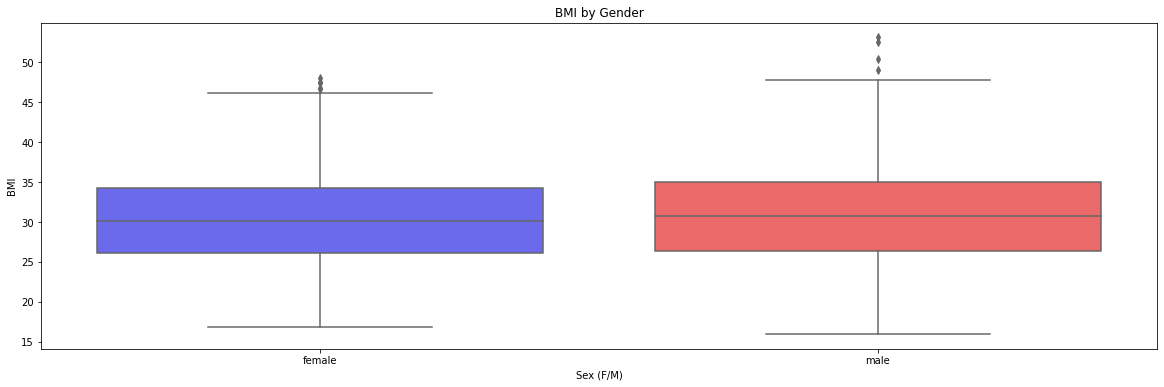

In [37]:
# Plot a boxplot comparing charges by BMI by Gender

plt.figure(figsize=(20,6)) # Set custom plot size (x,y)
sns.boxplot(x='sex', y='bmi', data=df, palette='seismic');
plt.title('BMI by Gender');
plt.xlabel('Sex (F/M)');
plt.ylabel('BMI');

In [38]:
# Build various metrics for comparison - BMI for Females vs. Males

# Calculate the Mean, Std Dev, and Variance for BMI by Female/Male and Overall

femalebmi = df['bmi'][df['sex']=='female']
malebmi = df['bmi'][df['sex']=='male']

# Mean
avgfemalbmi = round(df['bmi'][df['sex']=='female'].mean(),2)
avgmalebmi = round(df['bmi'][df['sex']=='male'].mean(),2)
avgoverallbmi = round(df['bmi'].mean(),2)

# Mean Std Dev
stdfemalbmi = round(df['bmi'][df['sex']=='female'].std(),2)
stdmalebmi = round(df['bmi'][df['sex']=='male'].std(),2)
stdoverallbmi = round(df['bmi'].std(),2)

# Variance (Std Dev squared)
popvarfemalbmi = round(stdfemalbmi**2,2)
popvarmalebmi = round(stdmalebmi**2,2)
popvaroverallbmi = round(stdoverallbmi**2,2)



print('')
print('Average BMI of Females: {}'.format(avgfemalbmi))
print('Average BMI of Males: {}'.format(avgmalebmi))
print('Average overall BMI: {}'.format(avgoverallbmi))

print('')
print('Std Dev - BMI of Females: {}'.format(stdfemalbmi))
print('Std Dev - BMI of Males: {}'.format(stdmalebmi))
print('Std Dev - Overall BMI: {}'.format(stdoverallbmi))

print('')
print('Pop Var - BMI of Females: {}'.format(popvarfemalbmi))
print('Pop Var - BMI of Males: {}'.format(popvarmalebmi))
print('Pop Var - Overall BMI: {}'.format(popvaroverallbmi))


Average BMI of Females: 30.38
Average BMI of Males: 30.94
Average overall BMI: 30.66

Std Dev - BMI of Females: 6.05
Std Dev - BMI of Males: 6.14
Std Dev - Overall BMI: 6.1

Pop Var - BMI of Females: 36.6
Pop Var - BMI of Males: 37.7
Pop Var - Overall BMI: 37.21


#### Observations - BMI Splits by Gender
- Initial visual observations appear to show that the BMIs for both genders are equal
    - The means/standard deviations/variances are similar but not identical between the genders
    - Further statistical analysis needs to be performed to test this claim

## Statistical Analysis - 0.05 Level of Significance

### BMI of Females vs. Males

### Stating the Null and Alternative Hypothesis

Let $\mu_1, \mu_2$ be the mean BMI scores of **Female** and **Male** beneficiaries.

**Null Hypothesis**

>$H_0:\mu_1=\mu_2$

**Alternate Hypothesis**

>$H_a:\mu_1\neq\mu_2$

### Are T-test assumptions Satisfied?

- **Continuous Data** - Yes, BMI scores are measured on a continuous scale
- **Normally Distributed Populations** - Yes, the populations are assumed to be normal (n>30)
- **Independent Populations** - As we are taking random samples for separate groups (Female and Male), the samples are from independent populations.
- **Unequal Population Standard Deviations** - The calculated sample standard deviations are **slightly different**, the population standard deviations may be assumed to be different
- **Random Sampling from Population** - Yes, the sample is believed to be a simple random sample

We can therefore use the two sample T-test for this problem.

In [39]:
# Import the required statistical function for the 2 Sample t-Test

from scipy.stats import ttest_ind

# Find the p-value
test_statistic, p_value = ttest_ind(femalebmi, malebmi, equal_var = False, alternative = 'two-sided')
print('The p-value is ', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is  0.08992430667834876
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

As the **p-value is higher** than the significance level of 0.05, we therefore **fail to reject the null hypothesis.**<br>
There is **not enough statistical significance** to state that the BMI of females is different to that of males.

### Confirm Results Using Rejection Region for a Two-Tailed Test

To find the rejection region on the normally distributed curve, we will find the values of the T-test (critical values) that give an area of the Level of Significance, or $\alpha$, divided by 2 (both the left and right end).

In [40]:
# Print the Test Statistic that was calculated in T-Test above

print('The test_statistic is ', round(test_statistic,3))

The test_statistic is  -1.697


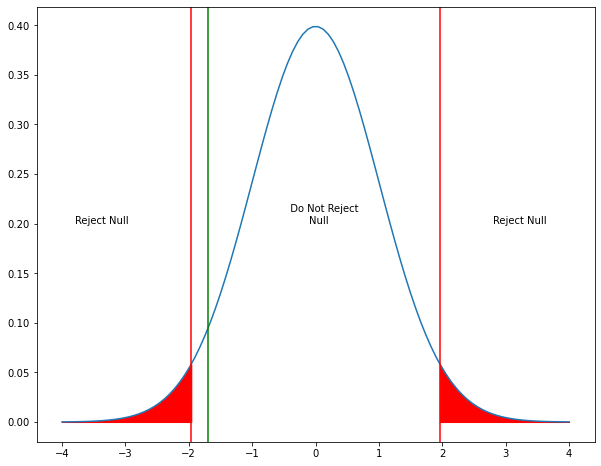

In [41]:
# Plot the Test Statistic vs. Critical Value to determine whether to Reject/Don't Reject the Null Hypothesis

# Import the required statistical function for calculating the two-sided percent point functions (ppf)
from scipy.stats import norm

# Find the Critical Values (Divide by 2 for two-tailed test)

critical_val1 = norm.ppf(1-(0.05/2)) # 1st Critical value (right side at 97.5%)
critical_val2 = norm.ppf(0.05/2) # 2nd Critical value (Left side at 2.5%)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations

plt.figure(figsize=(10,8)) # Set custom plot size (x,y)

x = np.linspace(-4, 4, 100) # Function to plot area on the x axis from -4 to 4, with 100 samples to ensure Normal Distribution (>=30)

plt.plot(x, norm.pdf(x, 0, 1)) # Plot a normal distribution graph with x-axis above
plt.axvline(x = critical_val1, c = 'r') # Plot the first (right) critical value line in red

x1 = np.linspace(critical_val1, 4, 50) # Function to plot area on the x axis from 1st Critical Value to 4, with 50 samples to ensure Normal Distribution (>=30)

plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # Fill the gap created to the right and including the 1st Critical Value
plt.axvline(x = critical_val2, c = 'r')  # Plot the second (left) critical value line in red

x2 = np.linspace(-4, critical_val2, 50) # Function to plot area the x axis from -4 to the 2nd Critical Value, with 50 samples to ensure Normal Distribution (>=30)

plt.fill_between(x2, norm.pdf(x2, 0, 1), color='r') # Fill the gap created between to the left and including the 2nd Critical Value

plt.annotate('Reject Null', (2.8, 0.20)) # Manually annotate/position Rejection Zone to the right of the normal distribution graph
plt.annotate('Reject Null', (-3.8, 0.20)) # Manually annotate/position Rejection Zone to the left of the normal distribution graph
plt.annotate('  Do Not Reject\n        Null', (-0.5, 0.2)); # Manually annotate/position the remaining Non-Rejection Zone

# Now plot the Test Statistic to Determine Whether/Not to Reject

plt.axvline(test_statistic, c='g'); # Plot the Test Statistic (Green), that was calculated above, on the distribution plot

### Insight

Since the **Test Statistic (approximately -1.7) lies outside (to the right) of the left rejection region**, we fail to reject the null hypothesis. Thus, there is **not enough statistical significance to state that the BMI of females is different to that of males.**

### Smokers/Non-Smokers by Region

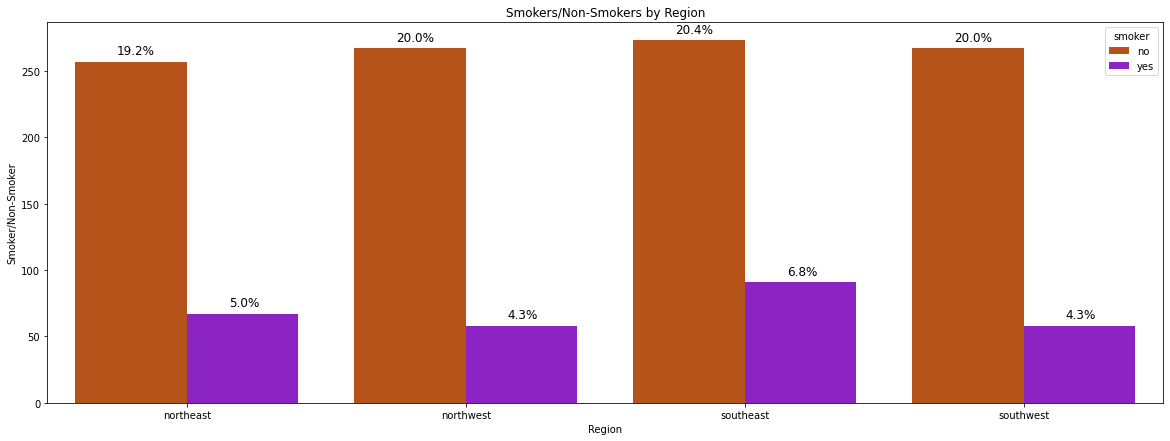

In [42]:
# Plot a Countplot comparing Smokers/Non-Smokers by Region

plt.figure(figsize=(20,7)) # Set custom plot size (x,y)
ax=sns.countplot(x='region', hue='smoker', data=df, palette='gnuplot_r');
plotpercent(ax,df['region'])

plt.title('Smokers/Non-Smokers by Region');
plt.xlabel('Region');
plt.ylabel('Smoker/Non-Smoker');

#### Observations - Smokers/Non-Smokers by Region
- The Southeast appears to have a slightly higher proportion of smokers, followed by the Northeast
- The proportion of non-smokers is relatively equal in all regions except the Northeast, which is slightly lower
- Further statistical analysis will be required in order to determine significance of proportions

## Statistical Analysis - 0.05 Level of Significance

### Proportions of Smokers by Region

### Stating the Null and Alternative Hypothesis

For Regions within the USA

**Null Hypothesis**

>$H_0:$ Smoking preference is independent of Region

**Alternate Hypothesis**

>$H_a:$ Smoking preference is dependent on Region.

### Are Chi-Square (Independence) Test Assumptions Satisfied?

- **Categorical Variable** - Yes, Smoker and Region
- **Number of Observations Greater than 5** - Yes, Each Level has at least 324 observations
- **Random Sampling from Population** - Yes, the sample is believed to be a simple random sample.

We can therefore use the Chi-Square Test for Independence for this problem.

In [43]:
# Create a summary contingency table of smokers using the Pandas Crosstab function

smokebyregion = pd.crosstab(df.region,df.smoker)
smokebyregion

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [44]:
# Import the required statistical function for the Chi-Square Test for Contingency

from scipy.stats import chi2_contingency

# Find the p-value using new contingency table - 'smokebyregion'
chi, p_value, dof, expected = chi2_contingency(smokebyregion)
print('The p-value is', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is 0.06171954839170541
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

As the **p-value is higher** than the significance level of 0.05, we therefore **fail to reject the null hypothesis.**<br>
There is **not enough statistical significance** to state that smoking preference is dependent on region.

### BMI of Females with 0-2 Children

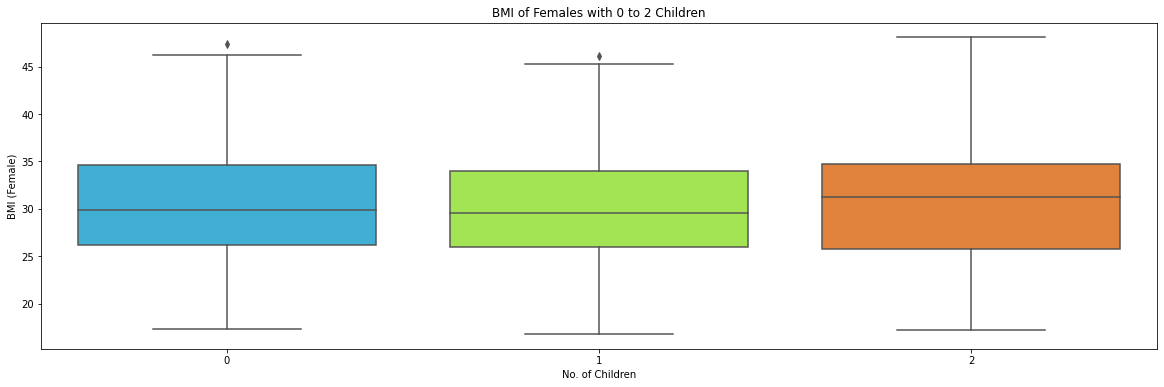

In [45]:
# Plot a Boxplot comparing BMI scores - only for Females with 0-2 Children

plt.figure(figsize=(20,6)) # Set custom plot size (x,y)

# Filter results for only Females with 0-2 Children
sns.boxplot(x=df['children'][df['children']<=2],y=df['bmi'][df['sex']=='female'], data=df, palette='turbo'); 
plt.title('BMI of Females with 0 to 2 Children');
plt.xlabel('No. of Children');
plt.ylabel('BMI (Female)');

#### Observations - BMI of Females with 0-2 Children
- Initial observations indicate that the BMIs are relatively equal amongst the three categories
- The median BMI for females with 2 children is slightly higher than for those with 0 to 1 children
- Further statistical analysis will be required in order to determine if any significant variances exist between the groups

## Statistical Analysis - 0.05 Level of Significance

### BMIs of Females with 0-2 Children

### Stating the Null and Alternative Hypothesis

**Null Hypothesis**

>$H_0: \mu_1 = \mu_2 = \mu_3$

**Alternate Hypothesis**

>$H_a:$ At Least One of the Female Groupings (0/1/2 Children) is Different from the Rest

In [46]:
# Create summary dataframe for BMI for females with 0 - 2 children

bmiupto2kids = df[['bmi','children','sex']][(df.children >= 0) & (df.children <= 2) & (df.sex == 'female')]
bmiupto2kids

,bmi,children,sex
0,27.90,0,female
5,25.74,0,female
6,33.44,1,female
9,25.84,0,female
11,26.29,0,female
...,...,...,...
1331,33.40,0,female
1334,31.92,0,female
1335,36.85,0,female
1336,25.80,0,female


In [47]:
# Print a summary of the mean BMI, by count of children (females only) in the above table

print(bmiupto2kids.groupby("children")["bmi"].mean())

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64


The means appear to be very similar for the three sections, however further statistical analysis is required to determine significance and whether or not at least one of the sections is different from the rest.

The **Normality** and **Equality** of variance assumptions need to be checked
- Normality = Shapiro-Wilk’s test
- Equality = Levene test

## Statistical Analysis - 0.05 Level of Significance

### Shapiro-Wilk’s Test


**Null Hypothesis**

>$H_0:$ Female BMI scores follow a normal distribution

**Alternate Hypothesis**

>$H_a:$ Female BMI scores do not follow a normal distribution

In [48]:
# Testing Assumption of Normalcy with Shapiro-Wilk's Test

from scipy import stats # Import the required function for the test

# Find the p-value using Shapiro-Wilk's Test

w, p_value = stats.shapiro(df['bmi'][df['sex']=='female']) # Run wide open for all female BMI scores to calculate normalcy
print('The p-value is', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is 0.0035433683078736067
The P-Value is less than the Level of Significance of 0.05.
We therefore reject the Null Hypothesis.


### Insight

Since the p-value of the test is smaller than the level of significance, we **reject the null hypothesis** that the response follows the normal distribution.

## Statistical Analysis - 0.05 Level of Significance

### Levene’s Test

**Null Hypothesis**

>$H_0$: All the population variances are equal

**Alternate Hypothesis**

>$H_a$: At least one variance is different from the rest

In [49]:
# Testing Assumption of Variance Equality with Levene's Test

from scipy.stats import levene # Import the required function for the Levene test

# Find the p-value using Levene's Test

# Refer to the three custom fields created in table 'bmiupto2kids' for female BMIs (0-2) Children
statistic, p_value = levene(bmiupto2kids['bmi'][bmiupto2kids['children']==0],
                           bmiupto2kids['bmi'][bmiupto2kids['children']==1],
                           bmiupto2kids['bmi'][bmiupto2kids['children']==2])
print('The p-value is', p_value)

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is 0.3899432394522804
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

Since the p-value of the test is far larger than the level of significance, we **fail to reject the null hypothesis** that population variances are equal.<br>
We can therefore assume, for the purposes of a one-way ANOVA test, that the population variances are equal.

Further statistical analysis is required to determine whether or not the BMI scores for females with 0 to 2 children are equal.<br>
**The ANOVA one-way test will be used** assuming normal distribution (in spite of Shapiro-Wilk's results) as well as equal variances.

### Recalling Hypothesis Above for ANOVA Test

## Statistical Analysis - 0.05 Level of Significance

### ANOVA Test

**Null Hypothesis**

>$H_0: \mu_1 = \mu_2 = \mu_3$

**Alternate Hypothesis**

>$H_a:$ At Least One of the Female Groupings (0/1/2 Children) is Different from the Rest

### Are ANOVA test assumptions satisfied?

- **Normally Distributed Populations** - Although the Shapiro-Wilks test failed the Null, we assume normal distribution for this test (n>30)
- **Independent Random Samples** - Yes, the sample is believed to be a simple random sample from Independent sources
- **Equal Population Variances** - Yes, the homogeneity of variance assumption is verified using the Levene's test

In [50]:
# Import the required function for a one-way ANOVA test

from scipy.stats import f_oneway

# Find the p-value using the One-Way ANOVA test and custom table 'bmiupto2kids'

test_statistic, p_value = f_oneway(bmiupto2kids['bmi'][bmiupto2kids['children'] == 0],
                              bmiupto2kids['bmi'][bmiupto2kids['children'] == 1],
                              bmiupto2kids['bmi'][bmiupto2kids['children'] == 2])
print('The p-value is ' + str(p_value))

# If/Else function based on p-value results
if p_value <=0.05:
    print('The P-Value is less than the Level of Significance of 0.05.\nWe therefore reject the Null Hypothesis.')
else:
    print('The P-Value is higher than the Level of Significance of 0.05.\nWe therefore fail to reject the Null Hypothesis.')

The p-value is 0.7158579926754841
The P-Value is higher than the Level of Significance of 0.05.
We therefore fail to reject the Null Hypothesis.


### Insight

Since the p-value of the test is very large, we **fail to reject the null hypothesis** that all three of the female BMI groupings are equal.

However, further analysis can be performed to test for specific differences between all pairs of means.

### Multiple Comparison Test (Tukey HSD)

In order to identify which, if any, of the mean BMI score grouping is different from the rest, the Null/Alternate Hypotheses are stated as follows:

### Multiple Comparison Test (Tukey HSD)

**Null Hypothesis**

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

**Alternate Hypothesis**

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [51]:
# Import the required function for Multiple Comparison Test (aka Tukey HSD)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Find the p-value using the Multiple Comparison Test and custom table 'bmiupto2kids'
multcomp = pairwise_tukeyhsd(endog = bmiupto2kids['bmi'], groups = bmiupto2kids['children'], alpha = 0.05)
print(multcomp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


### Insight

As expected, based on findings from the ANOVA test above, **the p-values (p-adj above) are far higher than the level of significance of 0.05 for all three groupings**.

One additional finding of interest is that **the p-values are relatively similar for the BMIs of females with 0 and 1 child (0.85 and 0.89 respectively)**, but substantially **lower for females with 2 children (0.68).**

Females with 2 children appear to have different BMIs to those with 0 or only 1 child.